In [86]:
#imported required libraries for preprocessing of the data
import pandas as pd
import numpy as np

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [88]:
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit


from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates

from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [89]:
from tensorflow.keras.optimizers import Adam 

In [90]:
#imported all the downloaded files from local computer
df1= pd.read_csv("/Users/abhia/Desktop/Abhi/Data/2015.csv")
df2= pd.read_csv("/Users/abhia/Desktop/Abhi/Data/2016.csv")
df3= pd.read_csv("/Users/abhia/Desktop/Abhi/Data/2017.csv")
df4= pd.read_csv("/Users/abhia/Desktop/Abhi/Data/2018.csv")
df5= pd.read_csv("/Users/abhia/Desktop/Abhi/Data/2019.csv")
df6= pd.read_csv("/Users/abhia/Desktop/Abhi/Data/2020.csv")
df7= pd.read_csv("/Users/abhia/Desktop/Abhi/Data/2021.csv")

In [91]:
#I would like to see the first 2 rows of a dataframe
df1.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATAMOTORS,EQ,06-Apr-2015,564.90,563.90,573.5,555.35,566.5,568.15,569.34,5728358,3.261385e+09,102382,3384350,59.08
1,TATAMOTORS,EQ,07-Apr-2015,568.15,569.05,570.7,554.05,561.0,560.35,560.60,3201751,1.794912e+09,61991,1682094,52.54


In [92]:
#I would like to see the first 2 rows of an another dataframe
df2.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATAMOTORS,EQ,04-Apr-2016,379.65,385.95,391.0,382.4,387.40,388.4,387.25,6011729,2.328038e+09,96258,2164588,36.01
1,TATAMOTORS,EQ,05-Apr-2016,388.40,386.00,386.0,369.0,370.05,370.5,377.62,6058241,2.287710e+09,89624,2345250,38.71


In [93]:
# I have used concat method to concatenate all the dataframes into one.
frames = [df1,df2,df3,df4,df5,df6,df7]
df = pd.concat(frames)
df.head(1)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATAMOTORS,EQ,06-Apr-2015,564.9,563.9,573.5,555.35,566.5,568.15,569.34,5728358,3.261385e+09,102382,3384350,59.08


In [94]:
# displaying last 5 rows to know whether the concatination happened correctly
df.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
245,TATAMOTORS,EQ,28-Mar-2022,432.10,432.00,434.95,426.50,432.6,432.70,431.20,16757901,7.226072e+09,152355,4388395,26.19
246,TATAMOTORS,EQ,29-Mar-2022,432.70,436.00,439.35,431.40,433.7,433.70,435.02,18710736,8.139614e+09,166038,5574807,29.79
247,TATAMOTORS,EQ,30-Mar-2022,433.70,438.45,442.50,434.25,434.8,435.65,439.04,18149488,7.968355e+09,181329,6705980,36.95
248,TATAMOTORS,EQ,31-Mar-2022,435.65,436.00,438.30,432.60,434.0,433.75,435.36,14248045,6.203013e+09,139107,4223114,29.64
249,TATAMOTORS,EQ,01-Apr-2022,433.75,434.00,442.25,430.85,440.9,441.15,437.60,19380324,8.480861e+09,211329,6254500,32.27


In [95]:
# checking specific index to know whether the concatination happened correctly
df.iloc[300]

Symbol                       TATAMOTORS
Series                               EQ
Date                        21-Jun-2016
Prev Close                       482.05
Open Price                        484.0
High Price                        486.2
Low Price                         477.6
Last Price                        484.3
Close Price                       484.9
Average Price                    482.43
Total Traded Quantity           8907801
Turnover                  4297416241.65
No. of Trades                     95613
Deliverable Qty                 4803735
% Dly Qt to Traded Qty            53.93
Name: 53, dtype: object

In [96]:
#export dataframe into excel
#df_1= df.to_excel('/Users/abhia/Desktop/Abhi/Data/df1.xlsx')

In [97]:
#converted date into yy-mm-dd in excel and importing excel back into jupyter
df= pd.read_excel('/Users/abhia/Desktop/Abhi/Data/df.xlsx')

In [98]:
df.head(1)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATAMOTORS,EQ,2015-04-06,564.9,563.9,573.5,555.35,566.5,568.15,569.34,5728358,3.261385e+09,102382,3384350,59.08


# Exploratory Data Analysis

In [99]:
# Missing values
df.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  1735 non-null   object        
 1   Series                  1735 non-null   object        
 2   Date                    1735 non-null   datetime64[ns]
 3   Prev Close              1735 non-null   float64       
 4   Open Price              1735 non-null   float64       
 5   High Price              1735 non-null   float64       
 6   Low Price               1735 non-null   float64       
 7   Last Price              1735 non-null   float64       
 8   Close Price             1735 non-null   float64       
 9   Average Price           1735 non-null   float64       
 10  Total Traded Quantity   1735 non-null   int64         
 11  Turnover                1735 non-null   float64       
 12  No. of Trades           1735 non-null   int64   

In [101]:
df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
count,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1.735000e+03,1.735000e+03,1.735000e+03
mean,319.937925,320.606628,325.263833,315.152450,319.875014,319.890403,320.299095,2.790604e+07,6.799365e+09,1.695308e+05
std,137.140700,137.347009,138.483355,135.745895,137.020126,137.044116,137.115307,3.438517e+07,8.486297e+09,1.457061e+05
min,65.300000,66.500000,66.900000,63.500000,65.450000,65.300000,65.500000,6.229990e+05,3.320928e+08,1.000000e+00
25%,179.950000,180.625000,183.475000,176.325000,179.825000,179.950000,179.810000,7.100828e+06,2.603877e+09,8.551700e+04
50%,333.550000,334.000000,338.500000,327.750000,333.500000,333.550000,333.160000,1.446570e+07,4.012042e+09,1.234960e+05
75%,436.950000,438.250000,443.000000,431.625000,436.825000,436.950000,437.500000,3.654463e+07,7.598019e+09,1.971835e+05
max,588.700000,590.750000,598.400000,584.000000,589.250000,588.700000,590.250000,3.905778e+08,9.853175e+10,1.517162e+06


In [102]:
#Checking the wrong symbols like -,?,#,*,etc.
for col in df.columns:
    print('{}:{}'.format(col, df[col].unique()))

Symbol:['TATAMOTORS']
Series:['EQ' 'BL']
Date:['2015-04-06T00:00:00.000000000' '2015-04-07T00:00:00.000000000'
 '2015-04-08T00:00:00.000000000' ... '2022-03-30T00:00:00.000000000'
 '2022-03-31T00:00:00.000000000' '2022-04-01T00:00:00.000000000']
Prev Close:[564.9  568.15 560.35 ... 432.7  435.65 433.75]
Open Price:[563.9  569.05 565.   ... 428.1  443.5  438.45]
High Price:[573.5  570.7  569.6  ... 442.5  438.3  442.25]
Low Price:[555.35 554.05 559.2  ... 434.25 432.6  430.85]
Last Price:[566.5 561.  563.  ... 432.4 434.8 440.9]
Close Price:[568.15 560.35 561.5  ... 435.65 433.75 441.15]
Average Price:[569.34 560.6  564.54 ... 439.04 435.36 437.6 ]
Total Traded Quantity:[ 5728358  3201751  3774897 ... 18149488 14248045 19380324]
Turnover:[3.26138490e+09 1.79491168e+09 2.13106491e+09 ... 7.96835474e+09
 6.20301289e+09 8.48086109e+09]
No. of Trades:[102382  61991  77756 ... 181329 139107 211329]
Deliverable Qty:[3384350 1682094 2105004 ... '    6705980' '    4223114' '    6254500']
% Dly 

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

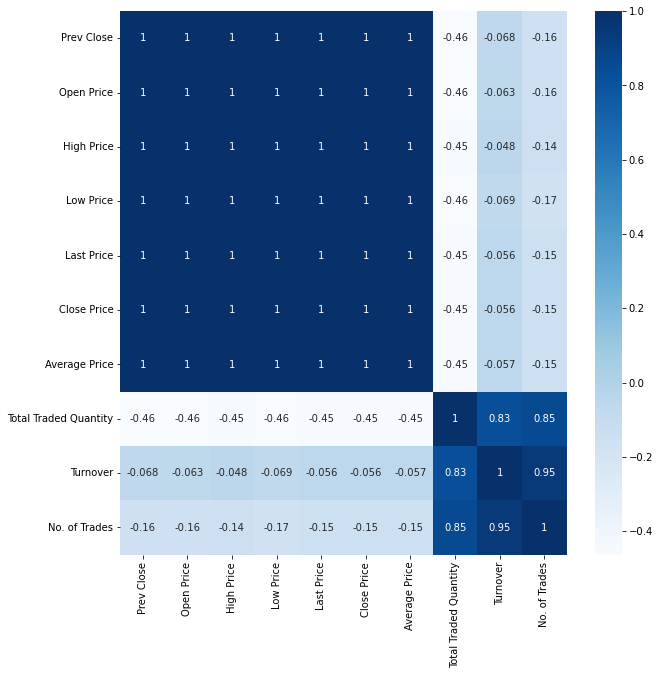

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'Close Price')

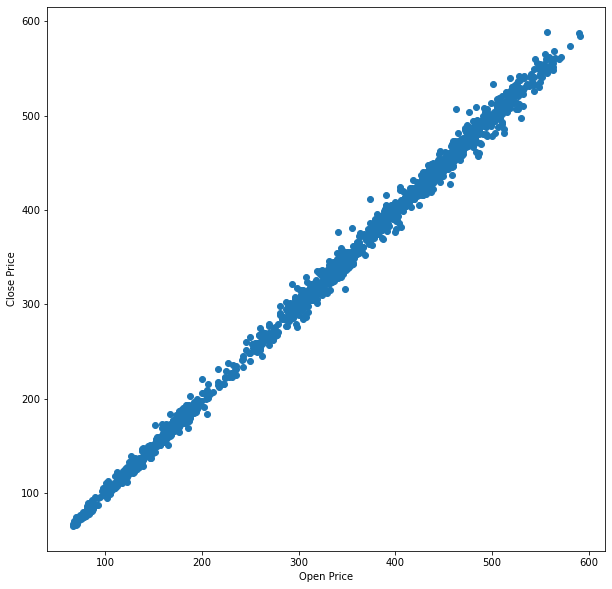

In [105]:
# Closing Price - Possitive Correlation: Prev Close, Open Price, High Price, Low Price, Last Price, Average Price
# Closing Price - Negative Correlation: Total Traded Quantity, Turnover, No.of trades

#Let's see how does the open price affect the closing price?

plt.figure(figsize=(10,10))
plt.scatter(x='Open Price', y='Close Price', data=df)
plt.xlabel('Open Price')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

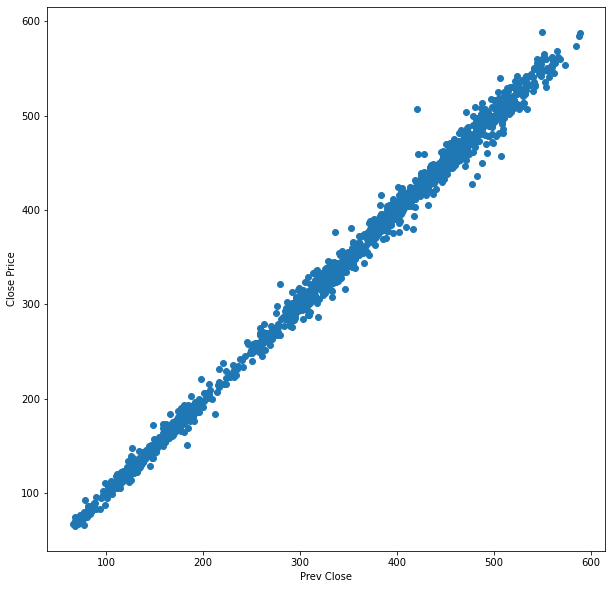

In [106]:
#Let's see how does the Previous Close affect the closing price?

plt.figure(figsize=(10,10))
plt.scatter(x='Prev Close', y='Close Price', data=df)
plt.xlabel('Prev Close')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

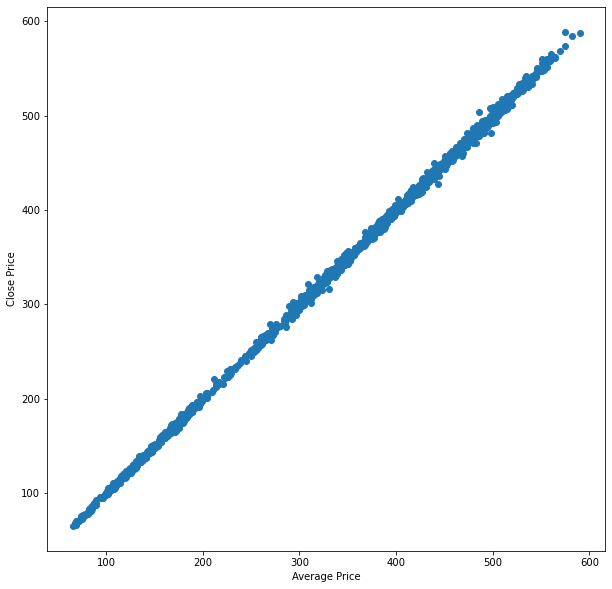

In [107]:
#Let's see how does the Average Price affect the closing price?

plt.figure(figsize=(10,10))
plt.scatter(x='Average Price', y='Close Price', data=df)
plt.xlabel('Average Price')
plt.ylabel('Close Price')


<AxesSubplot:xlabel='Open Price', ylabel='Series'>

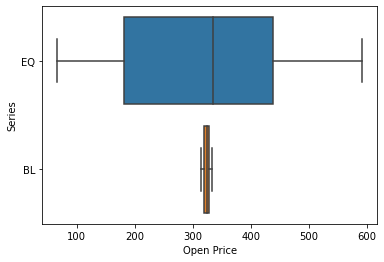

In [108]:
# Relationship between opening price and closing price
sns.boxplot(x='Open Price', y='Series', data=df)

<AxesSubplot:xlabel='Close Price', ylabel='Series'>

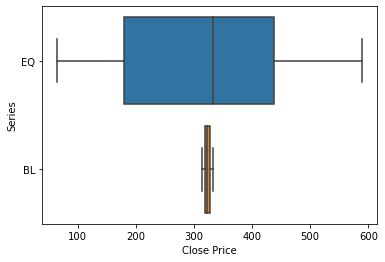

In [109]:
sns.boxplot(x='Close Price', y='Series', data=df)

Text(0, 0.5, 'Close Price')

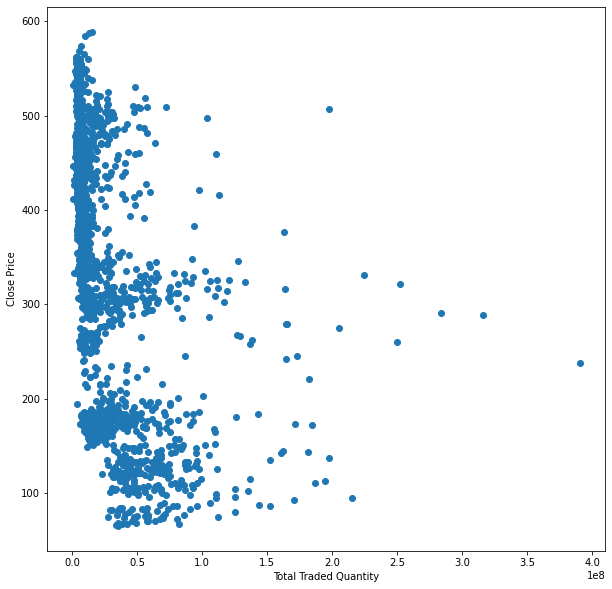

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(x='Total Traded Quantity', y='Close Price', data=df)
plt.xlabel('Total Traded Quantity')
plt.ylabel('Close Price')

In [111]:
#setting index as date
df.index = df['Date']
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2015-04-06,TATAMOTORS,EQ,2015-04-06,564.90,563.90,573.50,555.35,566.50,568.15,569.34,5728358,3.261385e+09,102382,3384350,59.08
2015-04-07,TATAMOTORS,EQ,2015-04-07,568.15,569.05,570.70,554.05,561.00,560.35,560.60,3201751,1.794912e+09,61991,1682094,52.54
2015-04-08,TATAMOTORS,EQ,2015-04-08,560.35,565.00,569.60,559.20,563.00,561.50,564.54,3774897,2.131065e+09,77756,2105004,55.76
2015-04-09,TATAMOTORS,EQ,2015-04-09,561.50,562.80,564.85,552.25,560.00,559.90,557.80,3043135,1.697464e+09,54869,1388363,45.62
2015-04-10,TATAMOTORS,EQ,2015-04-10,559.90,558.80,569.40,555.55,561.85,562.65,561.79,2808049,1.577539e+09,46542,1150169,40.96


In [112]:
#simple moving average(SMA)
#rolling period 10days

df['SMA_10'] = df['Open Price'].rolling(window =10, min_periods=1).mean()

df.head(1)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,SMA_10
Date,,,,,,,,,,,,,,,,
2015-04-06,TATAMOTORS,EQ,2015-04-06,564.9,563.9,573.5,555.35,566.5,568.15,569.34,5728358,3.261385e+09,102382,3384350,59.08,563.9


<AxesSubplot:xlabel='Date'>

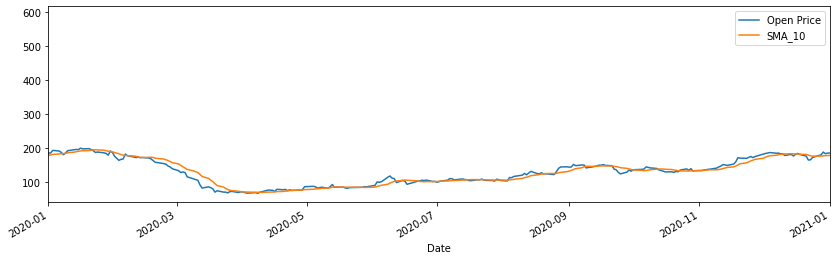

In [113]:
df[['Open Price', 'SMA_10']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(14,4))

<AxesSubplot:xlabel='Date'>

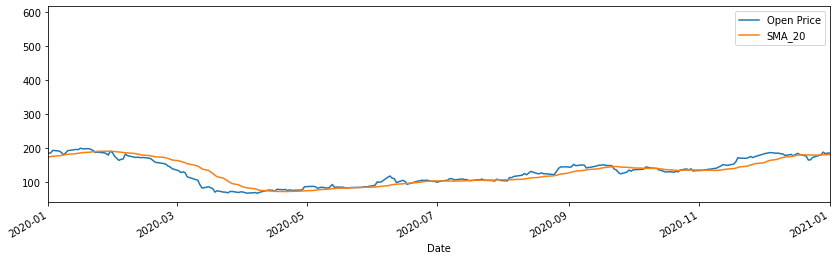

In [114]:
#SMA 20 days
df['SMA_20'] = df['Open Price'].rolling(window =20, min_periods=1).mean()

df.head(1)
df[['Open Price', 'SMA_20']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(14,4))

<AxesSubplot:xlabel='Date'>

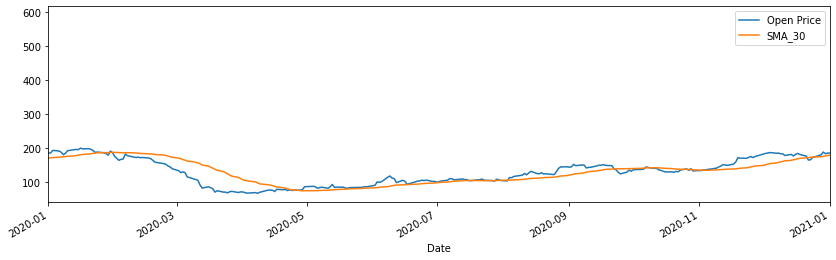

In [115]:
#SMA 30 days
df['SMA_30'] = df['Open Price'].rolling(window =30, min_periods=1).mean()

df.head(1)
df[['Open Price', 'SMA_30']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(14,4))

<AxesSubplot:xlabel='Date'>

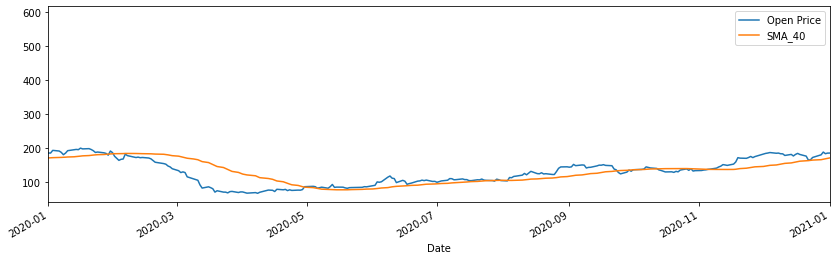

In [116]:
#SMA 40 days
df['SMA_40'] = df['Open Price'].rolling(window =40, min_periods=1).mean()

df.head(1)
df[['Open Price', 'SMA_40']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(14,4))

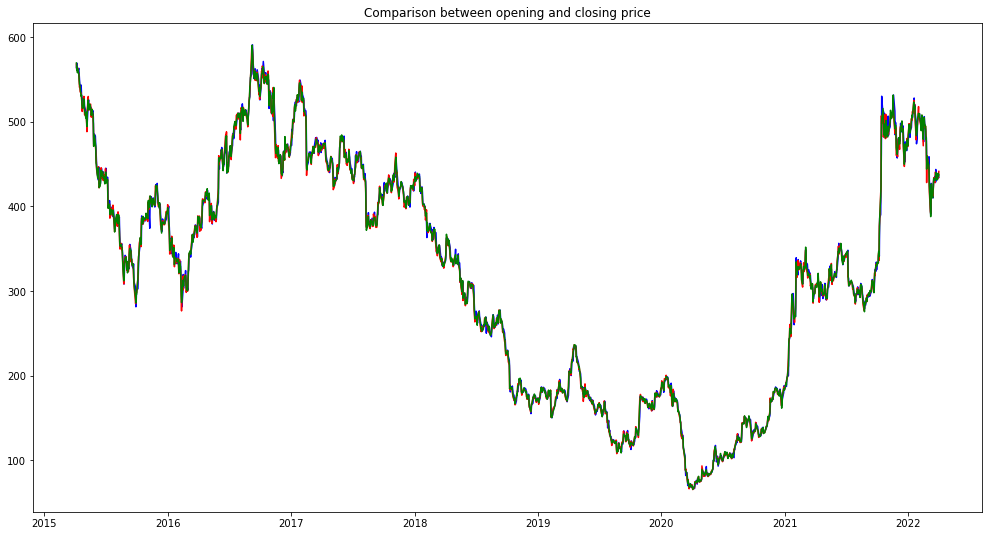

In [117]:
plt.figure(figsize=(17,9))
plt.title('Comparison between opening and closing price')
plt.plot(df['Open Price'], color='Blue')
plt.plot(df['Close Price'], color='Red')
plt.plot(df['Average Price'], color='Green')

<AxesSubplot:xlabel='Date'>

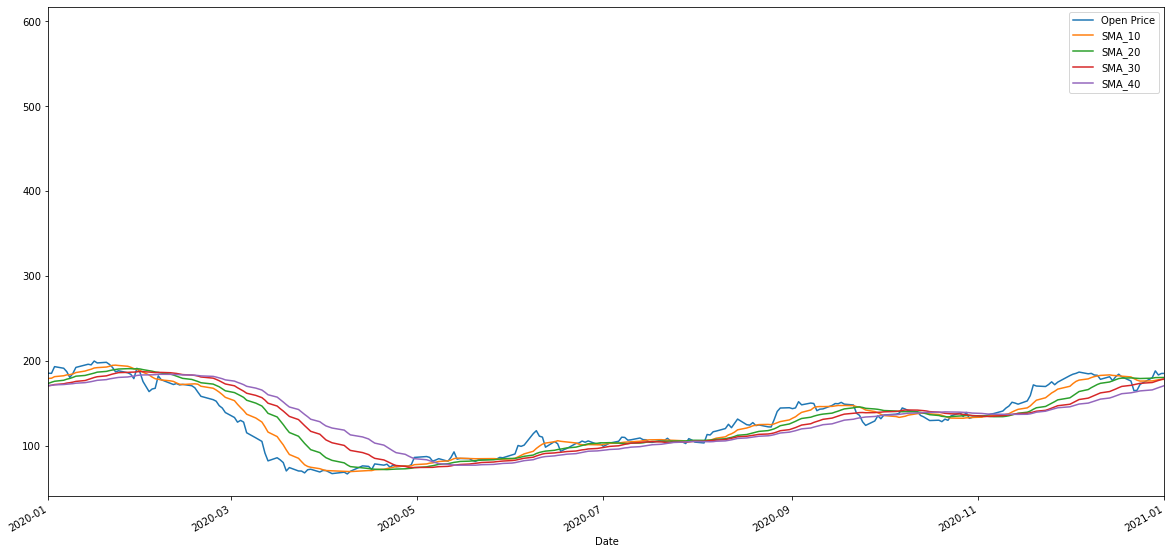

In [118]:
df[['Open Price', 'SMA_10', 'SMA_20', 'SMA_30','SMA_40']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(20,10))


<AxesSubplot:>

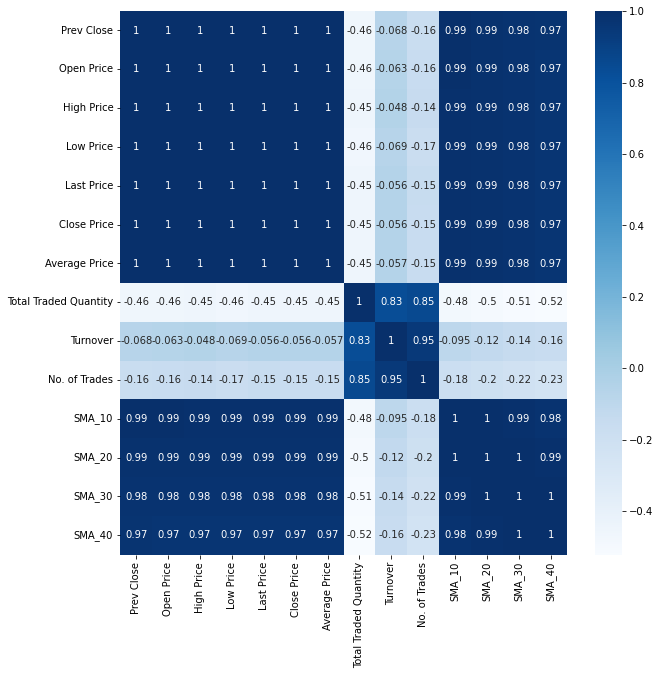

In [119]:
#according to the visual observation SMA_10(Orange) is very near to the Open Price(Blue)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:xlabel='Date'>

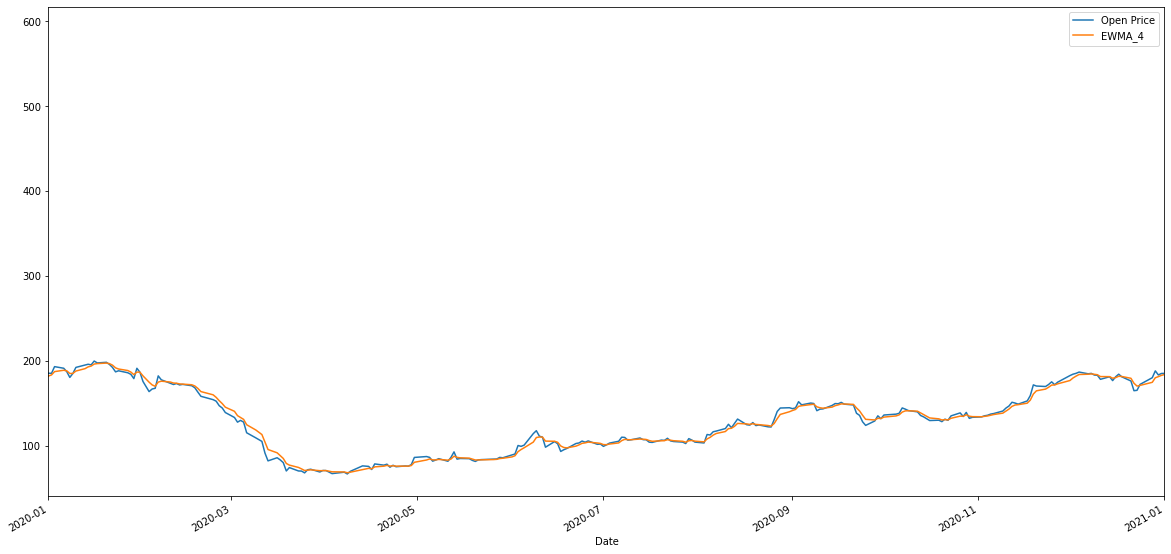

In [120]:
# Correlation matrix confirmed the same. 
#Exponential weighted moving average 4days.
df['EWMA_4'] = df['Open Price'].ewm(span=4, adjust=False).mean()
df[['Open Price', 'EWMA_4']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(20,10))


<AxesSubplot:xlabel='Date'>

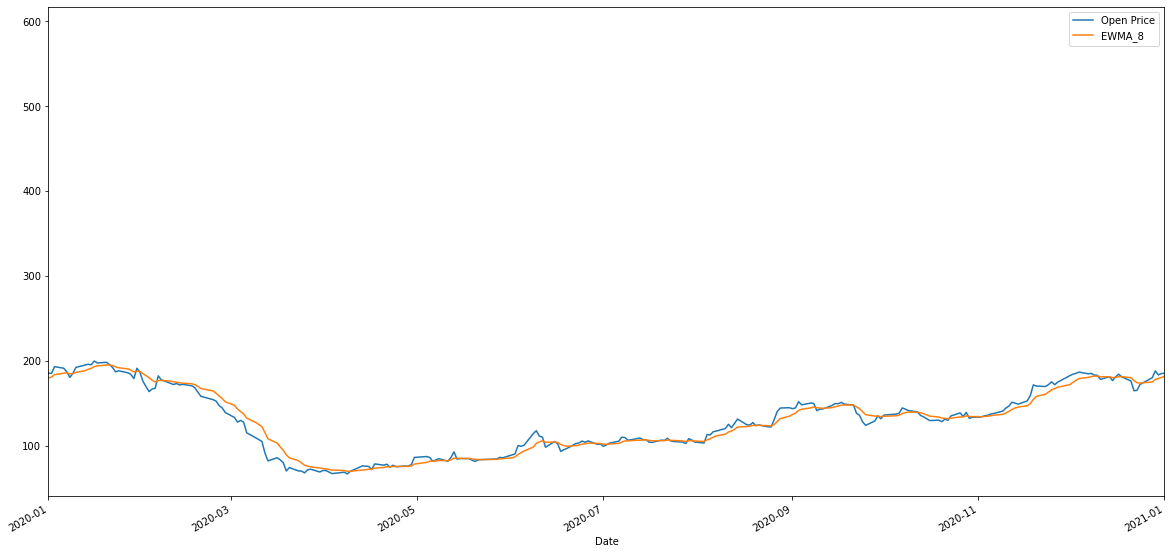

In [121]:
 
#Exponential weighted moving average 8 days.
df['EWMA_8'] = df['Open Price'].ewm(span=8, adjust=False).mean()
df[['Open Price', 'EWMA_8']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(20,10))

<AxesSubplot:xlabel='Date'>

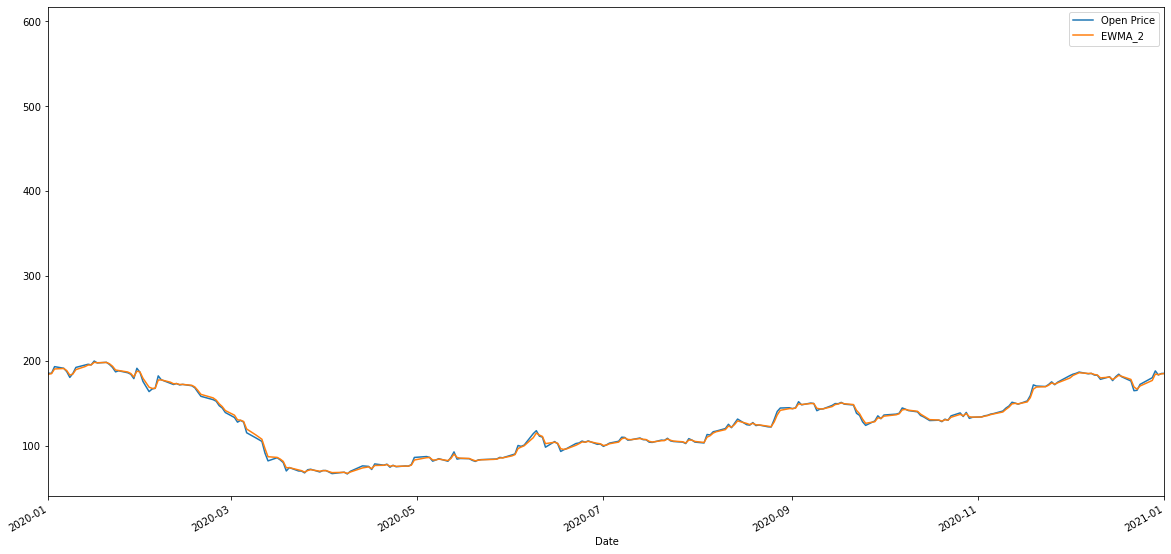

In [122]:
 #Exponential weighted moving average 8 days.
df['EWMA_2'] = df['Open Price'].ewm(span=2, adjust=False).mean()
df[['Open Price', 'EWMA_2']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(20,10))

<AxesSubplot:xlabel='Date'>

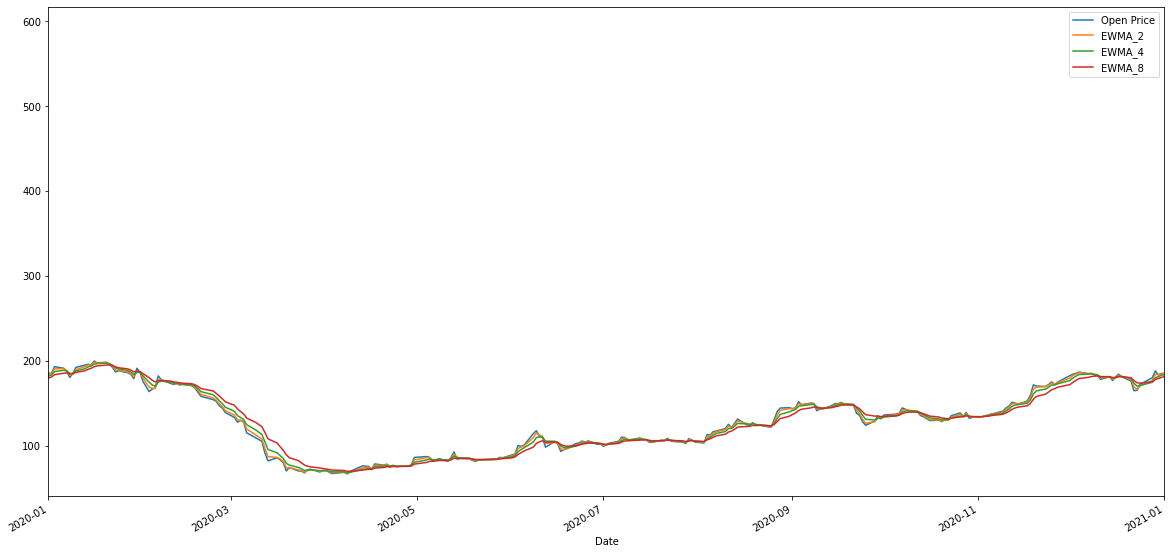

In [123]:
# ema vs open price
df[['Open Price', 'EWMA_2', 'EWMA_4', 'EWMA_8']].plot(xlim=['2020-01-01','2021-01-01'], figsize=(20,10))


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,SMA_10,SMA_20,SMA_30,SMA_40,EWMA_4,EWMA_8,EWMA_2
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-06,TATAMOTORS,EQ,2015-04-06,564.9,563.9,573.5,555.35,566.5,568.15,569.34,...,102382,3384350,59.08,563.9,563.9,563.9,563.9,563.9,563.9,563.9


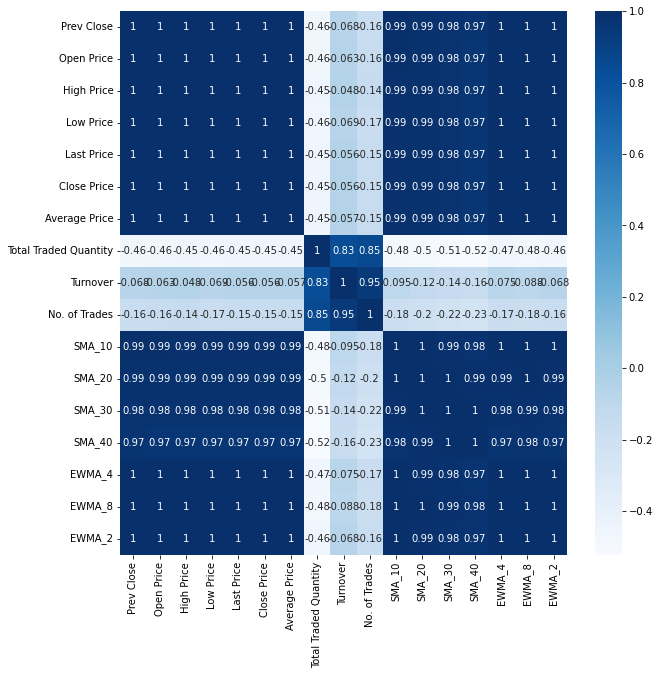

In [124]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
df.head(1)

In [125]:

df.drop(['Symbol', 'No. of Trades', 'Turnover', 'Total Traded Quantity','% Dly Qt to Traded Qty', 'SMA_10' ,'SMA_20','SMA_30', 'SMA_40'], axis = 1, inplace=True)
df.head(1)

,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Deliverable Qty,EWMA_4,EWMA_8,EWMA_2
Date,,,,,,,,,,,,,
2015-04-06,EQ,2015-04-06,564.9,563.9,573.5,555.35,566.5,568.15,569.34,3384350,563.9,563.9,563.9


# Multiple Linear Regression

In [ ]:
ind = df[['Open Price', 'High Price', 'Low Price', 'EWMA_4', 'Average Price']]
dep = df['Close Price']


In [77]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.3, random_state=0)


In [78]:

from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)
y_pred= regressor.predict(X_test)


mean_squared_error: 4.7 mean_absolute_error: 1.57 RMSE: 2.17
Regressor Score: 0.9997633198464724


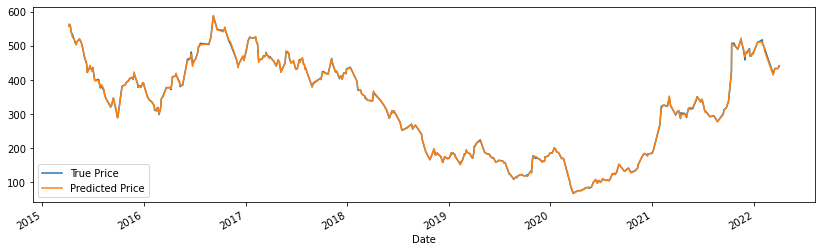

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
df_new= pd.DataFrame({'True Price':y_test, 'Predicted Price': y_pred})
df_new

df_new[['True Price', 'Predicted Price']].plot( figsize=(14,4))
regressor.score(X_test,y_test)
MSE=mean_squared_error(y_test,y_pred,squared=True)
MAE= mean_absolute_error(y_test,y_pred)

RMSE= math.sqrt(MSE)
print('mean_squared_error:',round(MSE, 2),  'mean_absolute_error:', round(MAE, 2), 'RMSE:', round(RMSE, 2))
print('Regressor Score:',regressor.score(X_test,y_test))

# LSTM

In [181]:
#Set Target Variable
output_var = pd.DataFrame(df['Close Price'])
#Selecting the Features
features = ['Open Price', 'High Price', 'Low Price', 'EWMA_4']

In [182]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open Price,High Price,Low Price,EWMA_4
Date,,,,
2015-04-06,0.948784,0.953151,0.944957,0.975024
2015-04-07,0.958608,0.947883,0.942459,0.979073
2015-04-08,0.950882,0.945814,0.952354,0.978318
2015-04-09,0.946686,0.936877,0.939001,0.976135
2015-04-10,0.939056,0.945437,0.945341,0.971680


In [183]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [184]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
print(trainX.shape )
print(testX.shape)
print(X_train.shape)
print(X_test.shape)

(1578, 4)
(157, 4)
(1578, 4)
(157, 4)


In [185]:
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [186]:
!pip install pydot
!pip install graphviz

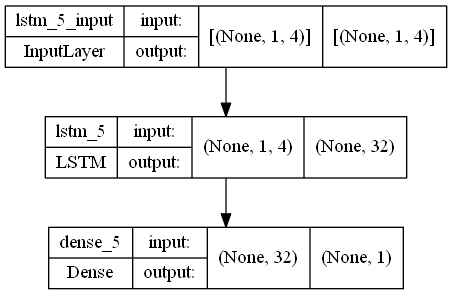

In [187]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [188]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
198/198 [==============================] - 3s 4ms/step - loss: 113373.7578
Epoch 2/100
198/198 [==============================] - 1s 4ms/step - loss: 111664.1484
Epoch 3/100
198/198 [==============================] - 1s 3ms/step - loss: 105577.5703
Epoch 4/100
198/198 [==============================] - 1s 3ms/step - loss: 94956.7344
Epoch 5/100
198/198 [==============================] - 1s 4ms/step - loss: 82094.8594
Epoch 6/100
198/198 [==============================] - 1s 4ms/step - loss: 68554.1797
Epoch 7/100
198/198 [==============================] - 1s 4ms/step - loss: 55266.6328
Epoch 8/100
198/198 [==============================] - 1s 4ms/step - loss: 42906.5586
Epoch 9/100
198/198 [==============================] - 1s 4ms/step - loss: 31966.2793
Epoch 10/100
198/198 [==============================] - 1s 3ms/step - loss: 22760.5215
Epoch 11/100
198/198 [==============================] - 1s 3ms/step - loss: 15423.3740
Epoch 12/100
198/198 [===========================

In [189]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

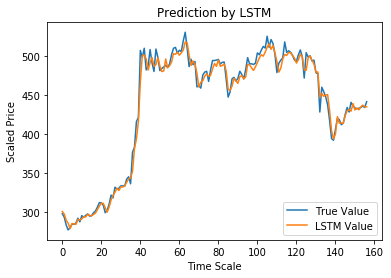

In [190]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

In [191]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
#mse= mean_squared_error(y_test, y_pred)
mse = mean_squared_error(
    y_test,
    y_pred,
    sample_weight=None,
    multioutput='uniform_average',
    squared=True)
mae= mean_absolute_error(
    y_test,
    y_pred)
r2= r2_score(y_test, y_pred)
print("mean_squared_error:", mse)
print("Mean Absolute Error:", mae)
print("R2_score:", r2)
import math
RMSE = math.sqrt(mse)
print("rmse:", rmse)


mean_squared_error: 64.98264301772635
Mean Absolute Error: 5.691563658501689
R2_score: 0.9892095411806796
rmse: 8.03803955269085
